## MACHINE LEARNING DAY-12 : Support Vector Machines


---

### What is SVM?

**Support Vector Machine (SVM)** is a powerful supervised machine learning algorithm used for **classification** and **regression** tasks. It is especially effective in **binary classification** problems and performs well in **high-dimensional feature spaces**, often where other algorithms struggle.

---

### 1. Core Idea

SVM tries to find the **best decision boundary** (called a hyperplane) that **maximally separates** the classes.

* The best hyperplane is the one with the **largest margin** between the two classes.
* **Support vectors** are the data points closest to the decision boundary — they are critical because the margin depends only on them.
* SVM's objective is to **maximize this margin**, leading to better generalization on unseen data.

---

### 2. Linear SVM

For linearly separable data, SVM finds a **linear hyperplane** that separates the two classes with the **widest possible margin**.

The equation of a hyperplane:

$$
w \cdot x + b = 0
$$

Where:

* $w$ = weight vector (perpendicular to the hyperplane)
* $x$ = feature vector (data point)
* $b$ = bias or intercept term

The **margin** is defined as:

$$
\text{Margin} = \frac{2}{\|w\|}
$$

Maximizing the margin is equivalent to minimizing $\|w\|^2$, subject to the constraint that the data points are correctly classified.

---

### 3. Non-Linear SVM and the Kernel Trick

Real-world datasets are rarely linearly separable. To deal with this, SVM uses a technique called the **kernel trick**, which allows it to learn a non-linear boundary **without explicitly computing the coordinates in higher-dimensional space**.

#### 3.1 Why go to higher dimensions?

Some datasets that **can’t be separated by a straight line in 2D** can be separated in **3D or higher**. The kernel trick projects data into a **higher-dimensional feature space**, where it becomes linearly separable.

Example: The classic XOR problem is **not linearly separable in 2D**, but it **is separable in a transformed 3D space**.

#### 3.2 What is a kernel?

A **kernel function** implicitly computes the **dot product in a high-dimensional space** without ever explicitly transforming the data. This keeps the computation efficient.

Formally, if $\phi(x)$ is a transformation of data into a higher-dimensional space, the kernel function is:

$$
K(x, x') = \phi(x) \cdot \phi(x')
$$

You don’t need to know $\phi(x)$; SVM just uses the kernel to compute distances in that space.

#### 3.3 Common Kernels

| Kernel         | Formula                                   | Use Case                               |
| -------------- | ----------------------------------------- | -------------------------------------- |
| Linear         | $K(x, x') = x \cdot x'$                   | Linearly separable data                |
| Polynomial     | $K(x, x') = (x \cdot x' + c)^d$           | Adds polynomial curves to the boundary |
| RBF (Gaussian) | $K(x, x') = \exp(-\gamma \|x - x'\|^2)$   | Best for most non-linear problems      |
| Sigmoid        | $K(x, x') = \tanh(\alpha x \cdot x' + c)$ | Behaves like neural networks           |

**RBF kernel** is the most commonly used for non-linear problems.

---

### 4. Soft Margin SVM

In real data, perfect separation is not always possible. To handle **overlapping classes or outliers**, SVM introduces a **slack variable** and a **penalty parameter `C`** to allow some misclassification.

* **Low C** → wider margin, more tolerance to misclassification (better generalization)
* **High C** → narrow margin, less tolerance (risk of overfitting)

---

### 5. High-Dimensional Spaces

SVM works extremely well in **high-dimensional** feature spaces because:

* The optimization problem only depends on **support vectors**, not the full dataset.
* The **curse of dimensionality** (where distance metrics become less meaningful) is **partially mitigated** because SVM maximizes the margin rather than fitting all points.
* With kernels like RBF, the transformation can **effectively create complex non-linear decision boundaries** even with just a few features.

---

### 6. Pros and Cons

#### Advantages:

* Excellent performance in high-dimensional and small-sample-size settings
* Effective for both linear and non-linear classification tasks
* Uses only a **subset of training points (support vectors)**, which makes it memory-efficient

#### Disadvantages:

* Training time increases significantly with large datasets
* Choosing the right kernel and hyperparameters (lik`'sigmoid'`, etc.

---

Would you like a diagram or code that shows **how the decision boundary changes with different kernels**?


### Importing the Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Dataset

In [6]:
df = pd.read_csv('../datasets/Social_Network_Ads.csv')
print(df.sample(10))

     Age  EstimatedSalary  Purchased
156   46            59000          0
320   52           138000          1
185   31            66000          0
74    32            18000          0
216   49            65000          0
149   20            74000          0
181   31            71000          0
234   38           112000          0
125   39            61000          0
380   42            64000          0


In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X)
print('\n')
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

### Splitting the dataset into training and test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)
print('\n')
print(X_test)
print('\n')
print(y_train)
print('\n')
print(y_test)
print('\n')

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print('\n')
print(X_test)

[[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]
 [ 3.67578135e-01  9.87132798e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [-6.04529329e-01  1.45068594e+00]
 [-2.12648508e-02 -5.77359062e-01]
 [-6.04529329e-01  1.88526701e+00]
 [ 1.33968560e+00 -1.41754914e+00]
 [ 1.43689635e+00  9.87132798e-01]
 [ 7.59458956e-02 -8.09135634e-01]
 [-2.12648508e-02 -2.58666276e-01]
 [-2.15686344e-01 -5

### Training the Linear SVM model on Training set

In [13]:
from sklearn.svm import SVC
classifier_linear = SVC(kernel = 'linear', random_state = 0)
classifier_linear.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

### Training the Kernel SVM model on Training set

In [15]:
from sklearn.svm import SVC
classifier_kernel = SVC(kernel = 'rbf', random_state = 0)
classifier_kernel.fit(X_train,y_train)

SVC(random_state=0)

### Predicting a new Result with Linear and kernel SVM

In [17]:
y_pred_new_linear = classifier_linear.predict(sc.transform([[30, 87000]]))
y_pred_new_kernel = classifier_kernel.predict(sc.transform([[30, 87000]]))
print('Linear SVM Prediction : ', y_pred_new_linear)
print('\n')
print('Kernel SVM Prediction : ',y_pred_new_kernel)

Linear SVM Prediction :  [0]


Kernel SVM Prediction :  [0]


### Predicting the test set result with Linear SVM

In [19]:
y_pred_linear = classifier_linear.predict(X_test)
print(np.concatenate((y_pred_linear.reshape(len(y_pred_linear), 1), y_test.reshape(len(y_pred_linear), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


### Predicting the test set result with Kernel SVM

In [21]:
y_pred_kernel = classifier_kernel.predict(X_test)
print(np.concatenate((y_pred_kernel.reshape(len(y_pred_linear), 1), y_test.reshape(len(y_pred_kernel), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


### Making the confusion Matrix for Linear SVM

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_linear)
print(cm)
accuracy_score(y_test, y_pred_linear)

[[57  1]
 [ 6 16]]


0.9125

### Making the confusion Matrix for Kernel SVM

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_kernel)
print(cm)
accuracy_score(y_test, y_pred_kernel)

[[55  3]
 [ 1 21]]


0.95

### Visualising the training set results on Linear SVM

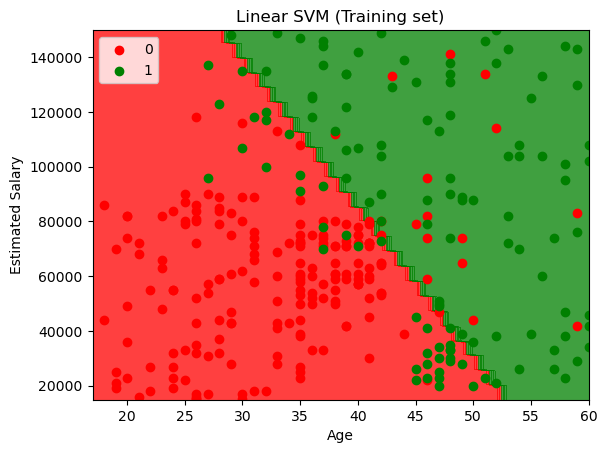

In [27]:
from matplotlib.colors import ListedColormap

# Inverse scaling to plot in original scale
X_set, y_set = sc.inverse_transform(X_train), y_train

# Choose a reasonable step size
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1.0),
    np.arange(start=X_set[:, 1].min() - 100, stop=X_set[:, 1].max() + 100, step=500.0)
)

# Predict the classifier's output for every point on the grid
grid_points = np.array([X1.ravel(), X2.ravel()]).T
grid_scaled = sc.transform(grid_points)
Z = classifier_linear.predict(grid_scaled).reshape(X1.shape)

# Plotting decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting training points
colors = ['red', 'green']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=colors[i], label=j)

plt.title('Linear SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the training set results on Kernel SVM

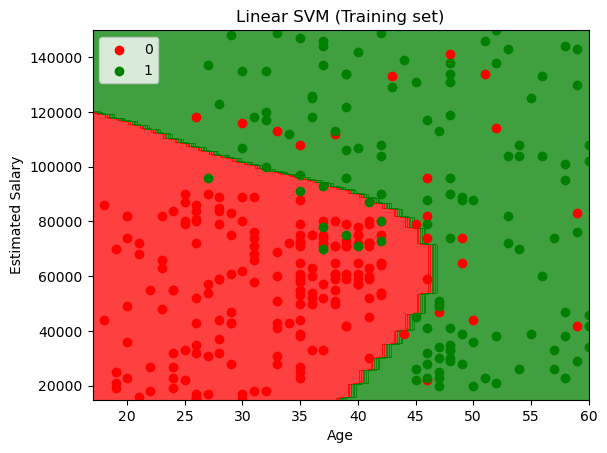

In [29]:
from matplotlib.colors import ListedColormap

# Inverse scaling to plot in original scale
X_set, y_set = sc.inverse_transform(X_train), y_train

# Choose a reasonable step size
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1.0),
    np.arange(start=X_set[:, 1].min() - 100, stop=X_set[:, 1].max() + 100, step=500.0)
)

# Predict the classifier's output for every point on the grid
grid_points = np.array([X1.ravel(), X2.ravel()]).T
grid_scaled = sc.transform(grid_points)
Z = classifier_kernel.predict(grid_scaled).reshape(X1.shape)

# Plotting decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting training points
colors = ['red', 'green']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=colors[i], label=j)

plt.title('Linear SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the test set results on Linear SVM

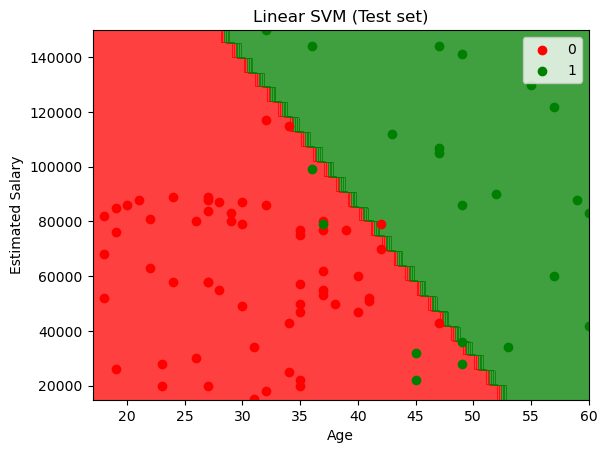

In [31]:
# Inverse transform the test features
X_set, y_set = sc.inverse_transform(X_test), y_test

# Choose optimized step sizes
step_x1 = 1.0
step_x2 = 500.0

# Create a grid over the feature space
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=step_x1),
    np.arange(start=X_set[:, 1].min() - 100, stop=X_set[:, 1].max() + 100, step=step_x2)
)

# Predict over the grid and reshape
grid_points = np.array([X1.ravel(), X2.ravel()]).T
Z = classifier_linear.predict(sc.transform(grid_points)).reshape(X1.shape)

# Plot decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot for actual test data
colors = ['red', 'green']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=colors[i], label=j)

# Labels and legend
plt.title('Linear SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the test set results on Kernel SVM

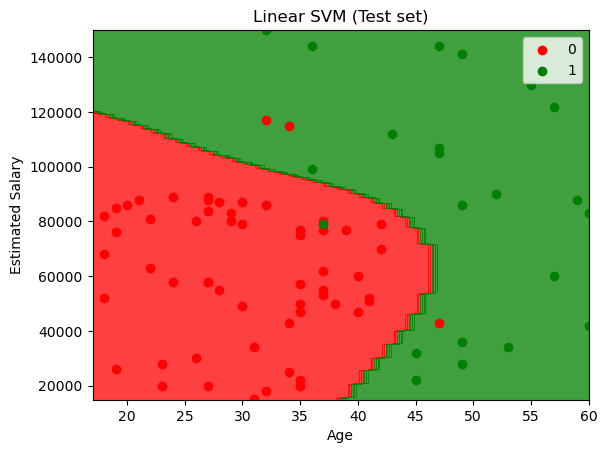

In [33]:
# Inverse transform the test features
X_set, y_set = sc.inverse_transform(X_test), y_test

# Choose optimized step sizes
step_x1 = 1.0
step_x2 = 500.0

# Create a grid over the feature space
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=step_x1),
    np.arange(start=X_set[:, 1].min() - 100, stop=X_set[:, 1].max() + 100, step=step_x2)
)

# Predict over the grid and reshape
grid_points = np.array([X1.ravel(), X2.ravel()]).T
Z = classifier_kernel.predict(sc.transform(grid_points)).reshape(X1.shape)

# Plot decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot for actual test data
colors = ['red', 'green']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=colors[i], label=j)

# Labels and legend
plt.title('Linear SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()